In [56]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
sns.set()
from sklearn.metrics import classification_report


In [57]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [58]:
dta['affair'] = (dta.affairs > 0).astype(int)
dta.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
1596,5.0,42.0,23.0,3.0,3.0,14.0,3.0,5.0,0.043478,1
1502,3.0,27.0,2.5,0.0,1.0,14.0,5.0,4.0,1.400000,1
6322,4.0,27.0,2.5,0.0,1.0,14.0,2.0,5.0,0.000000,0
740,4.0,37.0,16.5,4.0,1.0,14.0,5.0,4.0,0.727273,1
4406,5.0,42.0,23.0,2.0,3.0,16.0,4.0,4.0,0.000000,0


In [59]:
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [60]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [ ]:
Obervations - Decrease in marriage rating with yrs marriage, children and age variable.

In [62]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Obervations - there is corelation between affair variable with yrs_marriage and age

In [63]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

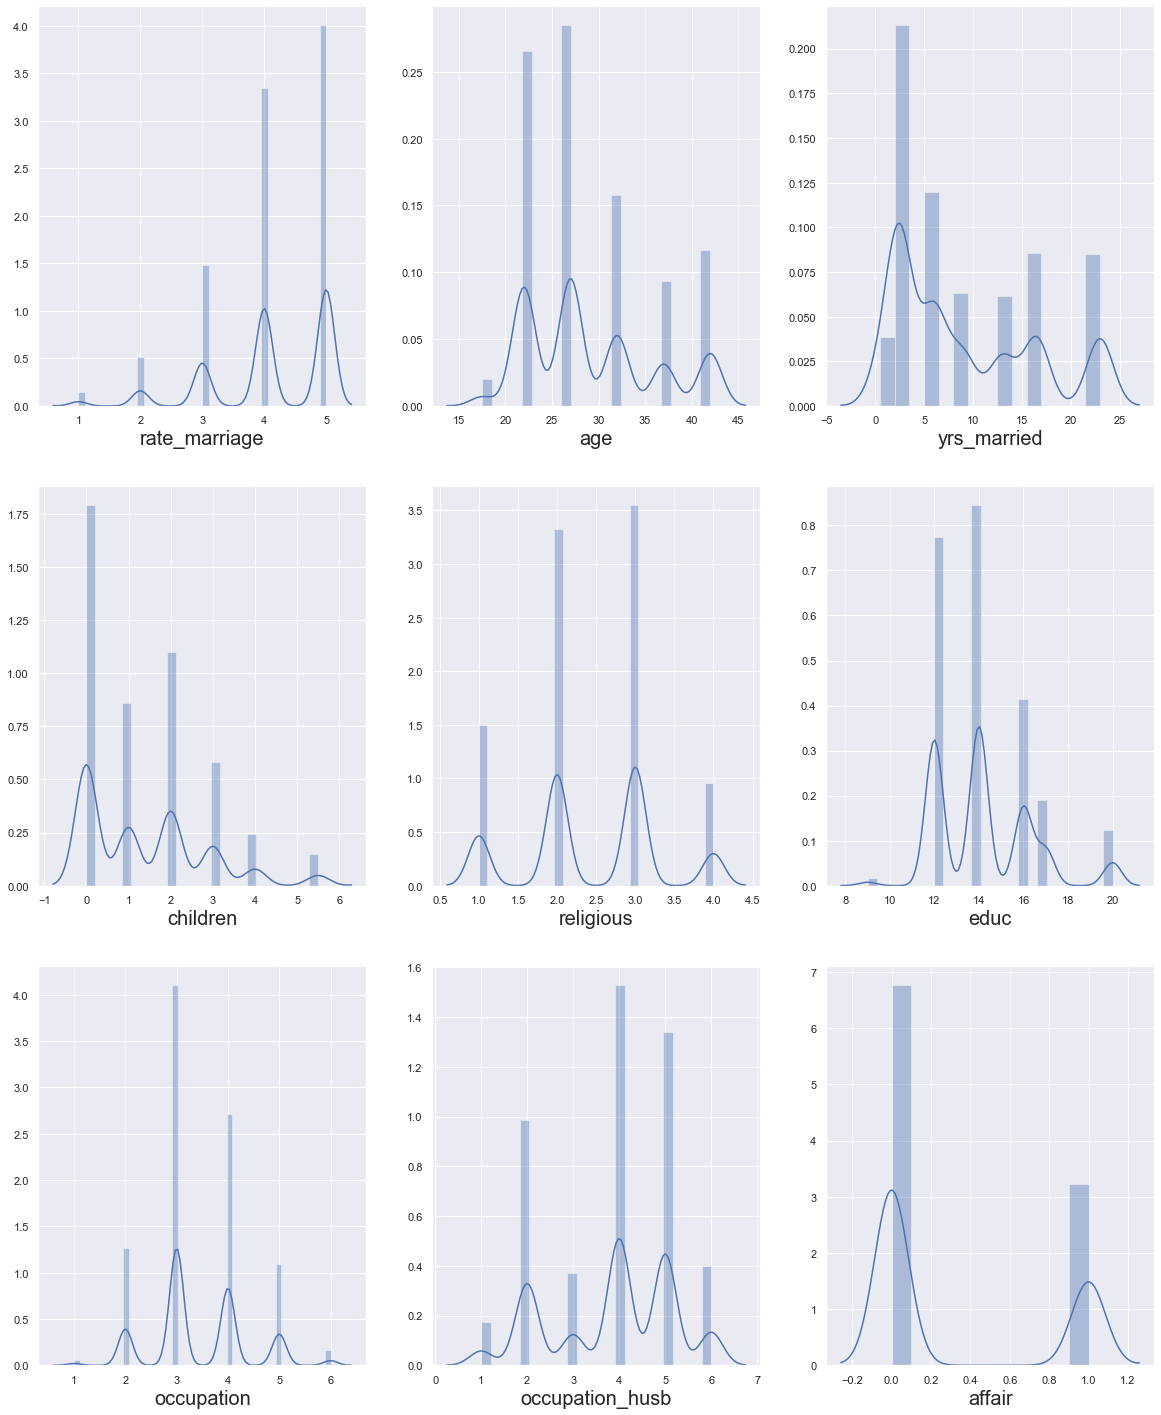

In [87]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for columns in dta:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[columns], hist=True)
        plt.xlabel(columns,fontsize=20)
    plotnumber +=1
plt.show()

In [89]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [90]:
x = dta.drop(columns = ['affair'], axis=1)
y = dta['affair']

In [91]:
y = np.ravel(y)


In [92]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [93]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


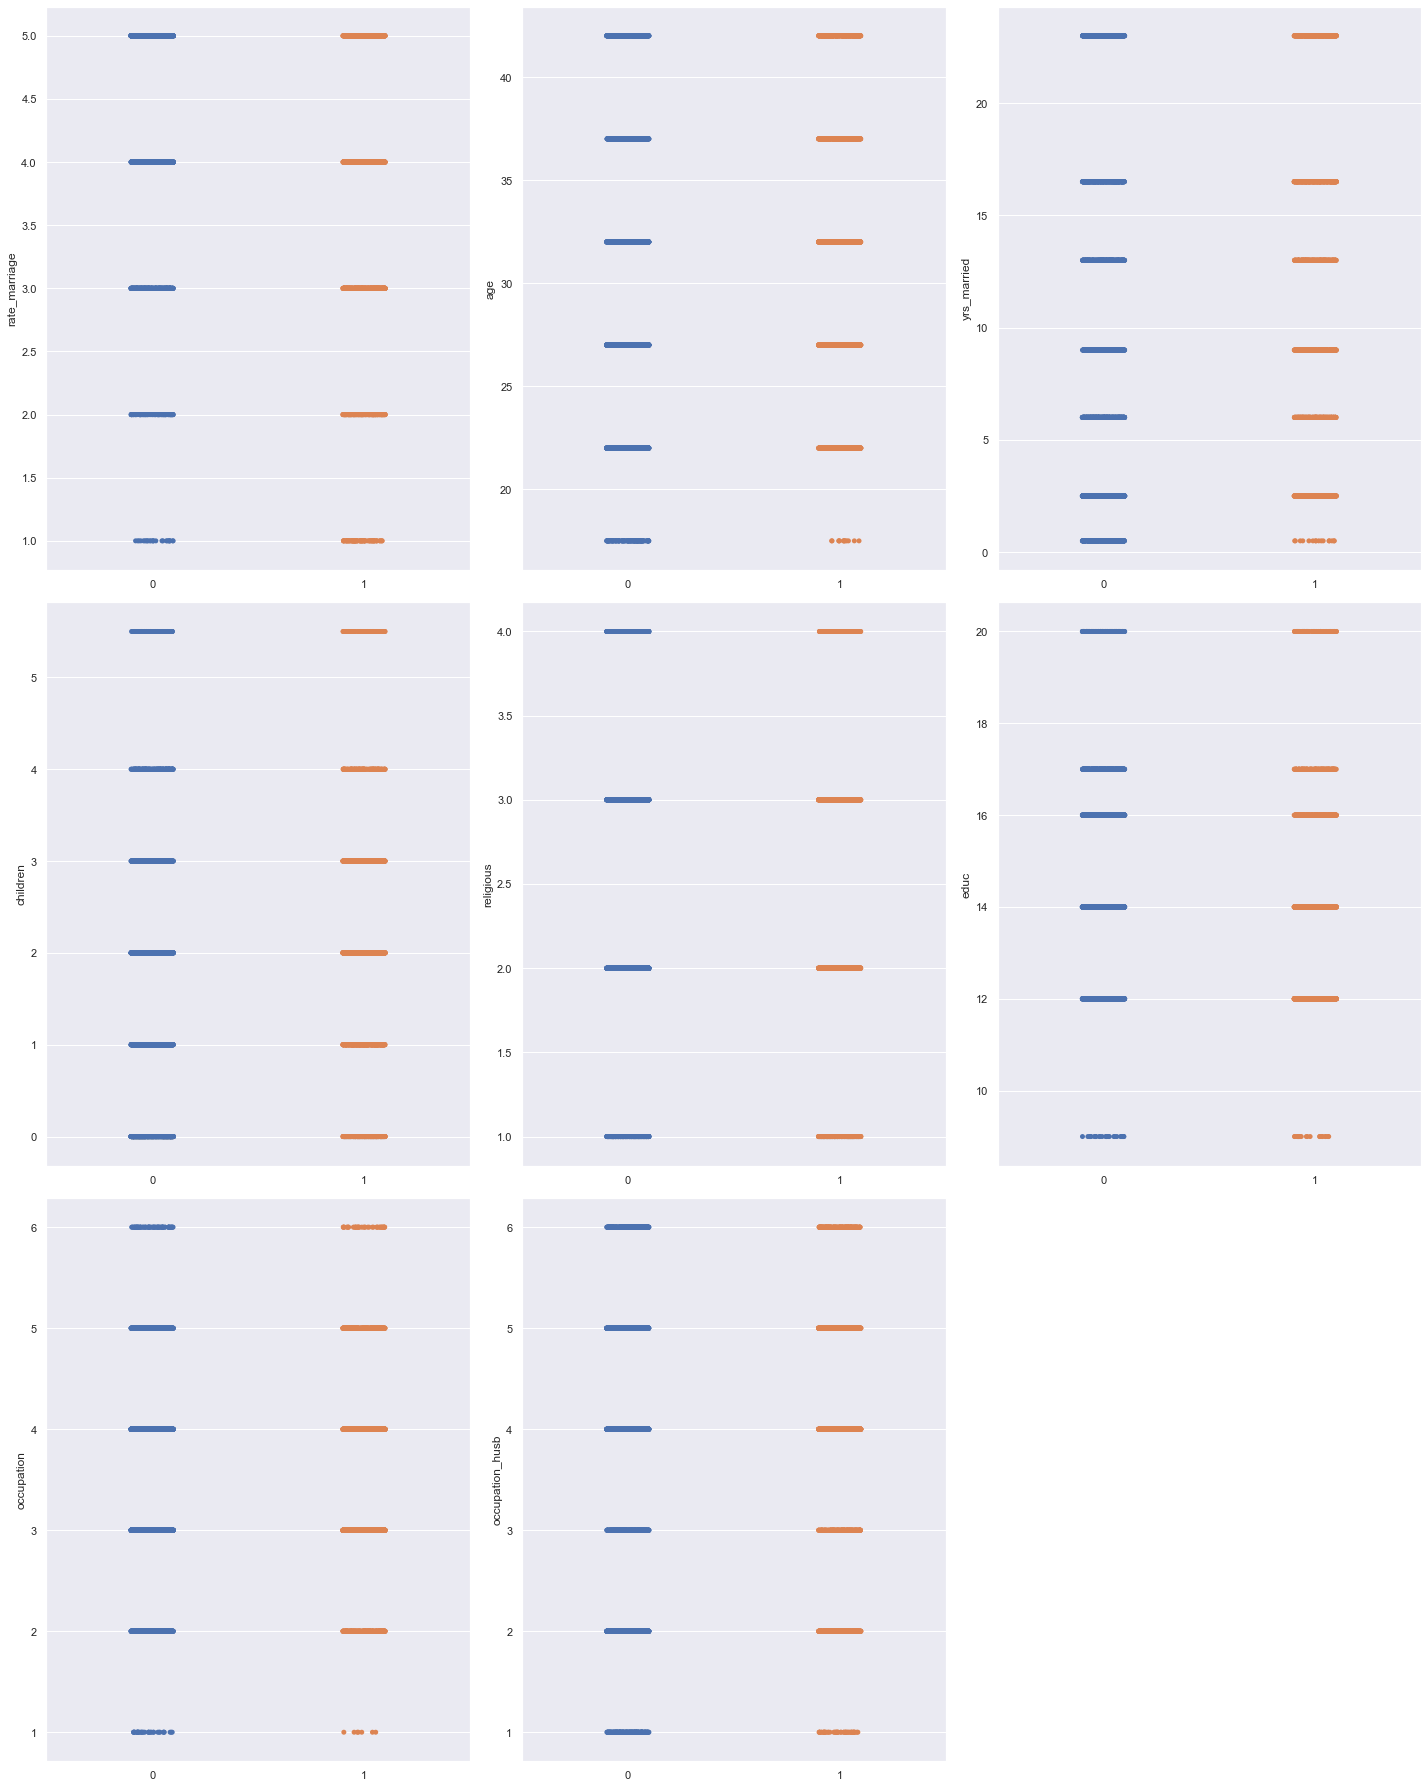

In [72]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [94]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [95]:
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
         1.28115287e+00, -1.51129246e+00,  8.54069123e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -4.50087100e-01,  8.54069123e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -9.63641611e-02, -4.50087100e-01, -2.11697133e+00],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -1.51129246e+00,  1.11309009e-01]])

In [96]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


VIF for yrs marraige and age variables are more then 5 so we can drop one columns for analysis.

Logistic analysis with all the Varaibles - 

In [97]:
x1 = x.drop(columns = ['age'], axis=1)

In [98]:
x1.head()

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,9.0,1.0,1.0,14.0,3.0,4.0


In [99]:
scalar = StandardScaler()
X_scaled1 = scalar.fit_transform(x1)

In [114]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled1 ,y, test_size= 0.3, random_state = 150)

In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4456, 7)
(1910, 7)
(4456,)
(1910,)


In [116]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred = log_reg.predict(x_test)
y_pred[30:40:]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [118]:
y_test[30:40:]

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [119]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7382198952879581

In [120]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1193,  118],
       [ 382,  217]], dtype=int64)

In [122]:
auc = roc_auc_score(y_test,y_pred)
auc

0.6361314114930936

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1311
           1       0.65      0.36      0.46       599

    accuracy                           0.74      1910
   macro avg       0.70      0.64      0.65      1910
weighted avg       0.72      0.74      0.71      1910



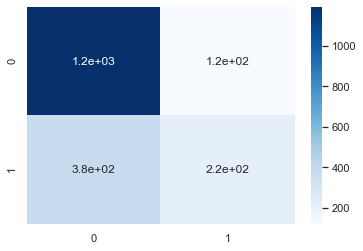

In [124]:
import seaborn as sns
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues')

In [125]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), x1, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72056515, 0.70172684, 0.74568289, 0.71742543, 0.70015699,
        0.73626374, 0.71698113, 0.69339623, 0.73899371, 0.7327044 ]),
 0.7203896507804864)

Model got average 72% score with 10 fold cross model validation.

In [113]:
y.mean()

0.3224945020420987

## Only 32% of the women had affairs, which means that the model can obtain 68% accuracy by always predicting “no”. Model got 72% accuracy which is good enough to predict the good results.

model predication considering all the columns

In [126]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled ,y, test_size= 0.3, random_state = 150)

In [127]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
y_pred = log_reg.predict(x_test)
y_pred[30:40:]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [129]:
y_test[30:40:]

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [130]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.737696335078534

In [131]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1194,  117],
       [ 384,  215]], dtype=int64)

In [132]:
auc = roc_auc_score(y_test,y_pred)
auc

0.6348433506645323

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1311
           1       0.65      0.36      0.46       599

    accuracy                           0.74      1910
   macro avg       0.70      0.63      0.64      1910
weighted avg       0.72      0.74      0.71      1910

